In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/titanic.csv")

# Data Wrangling

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

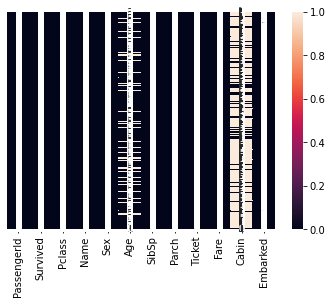

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,annot=True)

## NAN Values

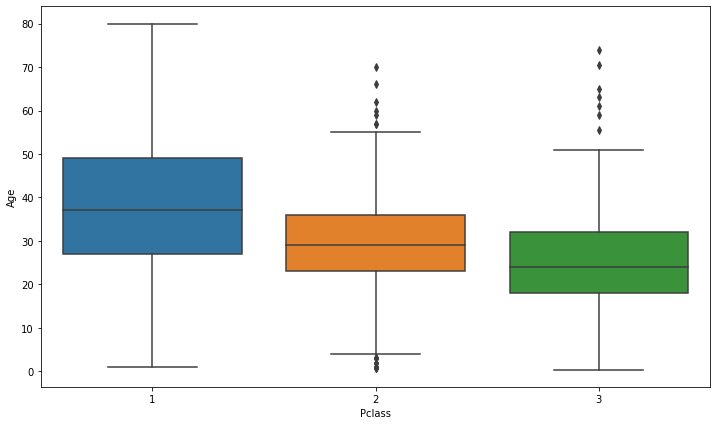

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df)


In [ ]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
      return Age    

In [ ]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'] = df['Embarked'].fillna('S')

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Categorical:
               Survived
               Pclass
               Sex
               SibSp
               Parch
               Embarked

# Numerical:
               PassengerId
               Age
               Fare

# Alpha Numerical:
               Name
               Ticket
               Cabin
                              

In [ ]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['SibSp']=df['SibSp'].astype('category')
df['Parch']=df['Parch'].astype('category')
df['Embarked']=df['Embarked'].astype('category')
df['Age']=df['Age'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(6), float64(1), int64(2), object(2)
memory usage: 41.3+ KB


# Exploratory Data Analysis (EDA)

# Univariate Analysis

### Categorical

Death Percentage:  61.61616161616161
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


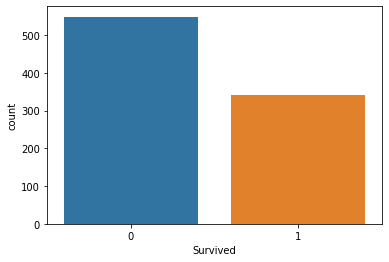

In [ ]:
#Survived
print("Death Percentage: ", (df['Survived'].value_counts().values[0]/df.shape[0])*100)
print('-' * 100)
sns.countplot(df['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


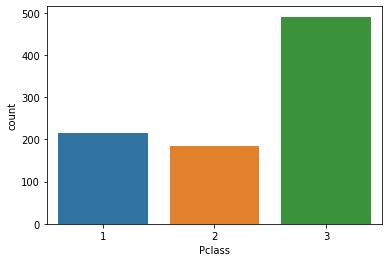

In [ ]:
#Pclass
sns.countplot(df['Pclass'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


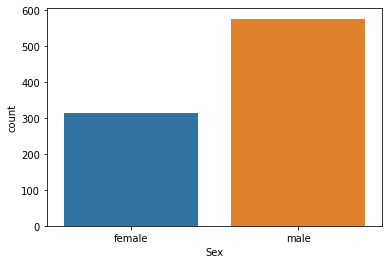

In [ ]:
#Sex
sns.countplot(df['Sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


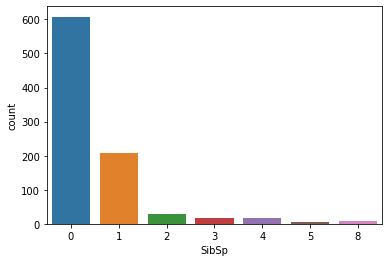

In [ ]:
#SibSp
sns.countplot(df['SibSp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


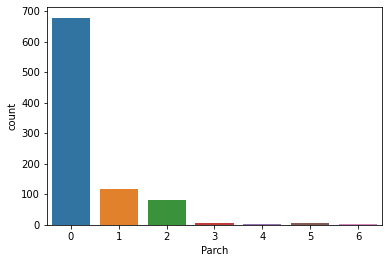

In [ ]:
#Parch
sns.countplot(df['Parch'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


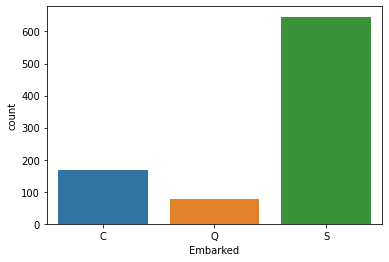

In [ ]:
#Embarked
sns.countplot(df['Embarked'])

### Numerical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.5420736897536542
0.7871265139324608
----------------------------------------------------------------------------------------------------


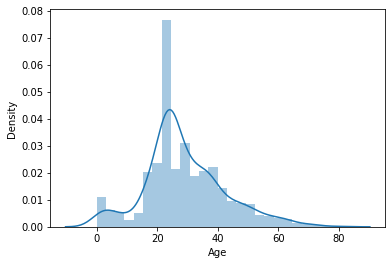

In [ ]:
#Age
print(df['Age'].skew())
print(df['Age'].kurt())
print('-' *100)
sns.distplot(df['Age'])

This is normal distribution.

4.787316519674893
33.39814088089868
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


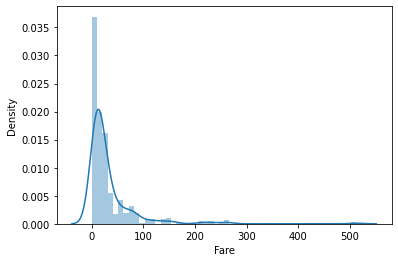

In [ ]:
#Fare
print(df['Fare'].skew())
print(df['Fare'].kurt())
print('-' *100)
sns.distplot(df['Fare'])

This is not normal distribution.

## Multivariate

### Categorical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


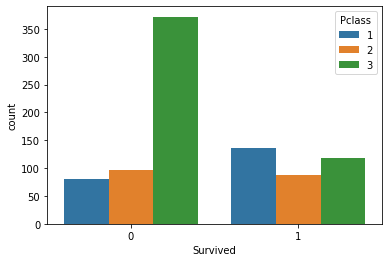

In [ ]:
#Survived vs Pclass
sns.countplot(df['Survived'],hue=df['Pclass'])

In [ ]:
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


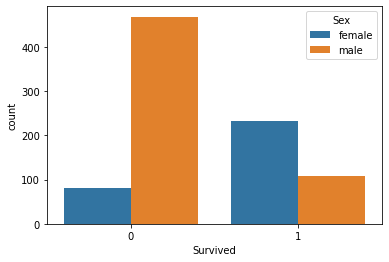

In [ ]:
#Survived vs Sex
sns.countplot(df['Survived'],hue=df['Sex'])

In [ ]:
pd.crosstab(df['Sex'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


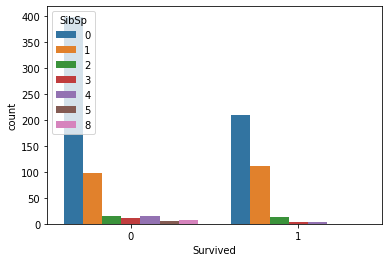

In [ ]:
#Survived vs SibSp
sns.countplot(df['Survived'],hue=df['SibSp'])

In [ ]:
pd.crosstab(df['SibSp'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
SibSp,,
0,65.5,34.5
1,46.4,53.6
2,53.6,46.4
3,75.0,25.0
4,83.3,16.7
5,100.0,0.0
8,100.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


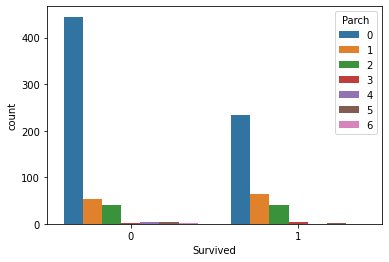

In [ ]:
#Survived vs Parch
sns.countplot(df['Survived'],hue=df['Parch'])

In [ ]:
pd.crosstab(df['Parch'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
Parch,,
0,65.6,34.4
1,44.9,55.1
2,50.0,50.0
3,40.0,60.0
4,100.0,0.0
5,80.0,20.0
6,100.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


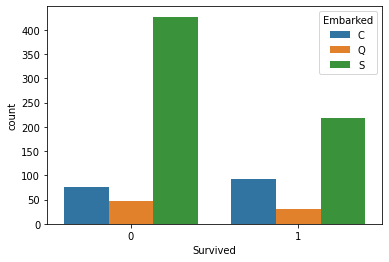

In [ ]:
#Survived vs Embarked
sns.countplot(df['Survived'],hue=df['Embarked'])

In [ ]:
pd.crosstab(df['Embarked'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


### Numerical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


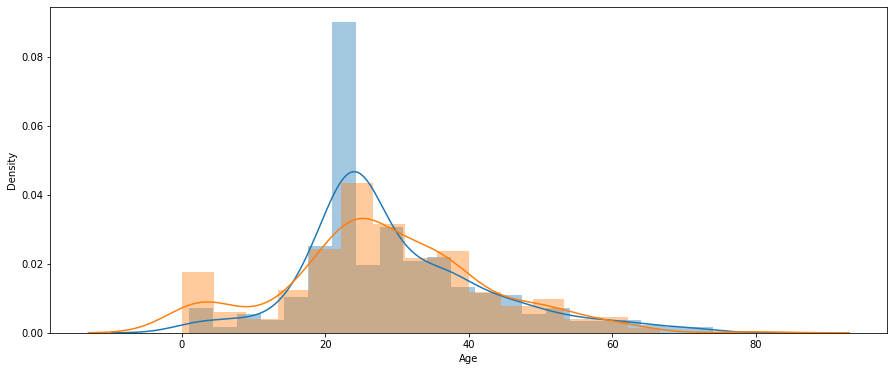

In [ ]:
# Survived VS Age
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


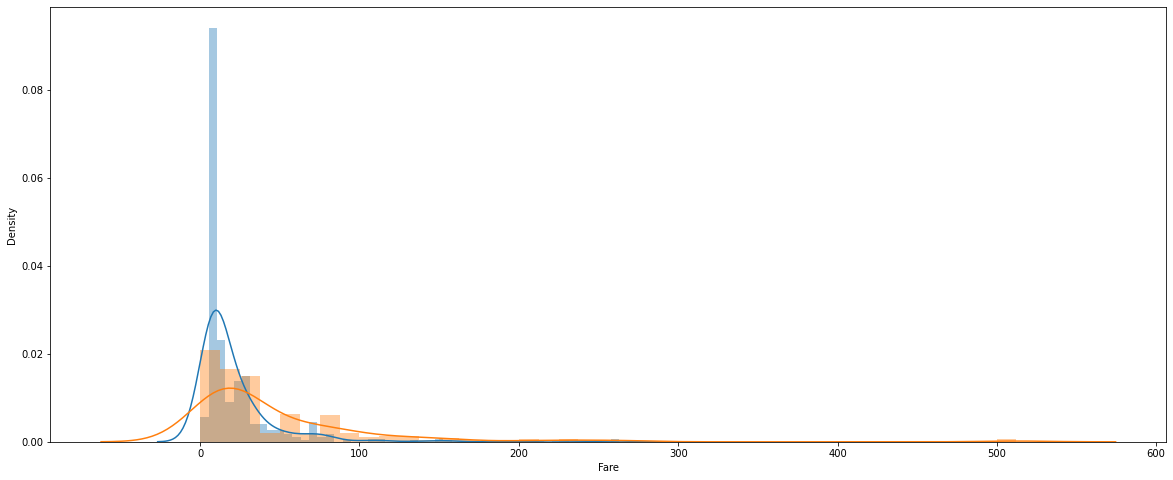

In [ ]:
# Survived VS Fare
plt.figure(figsize=(20,8))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

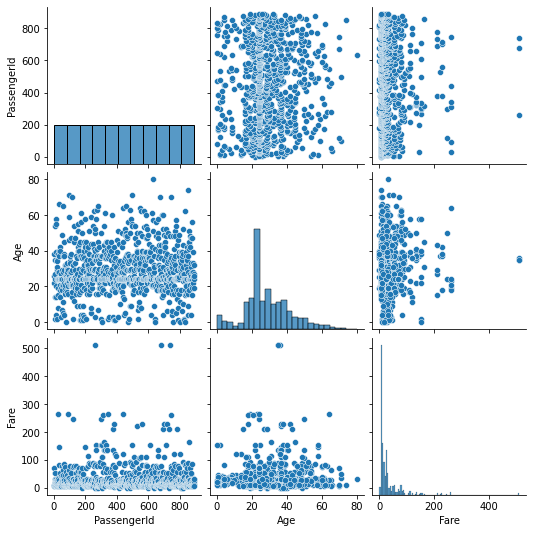

In [ ]:
## Pair Plot
sns.pairplot(df)

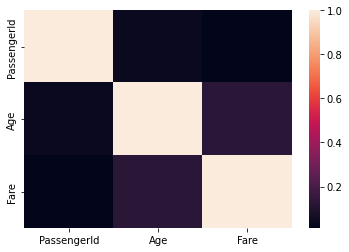

In [ ]:
#Correlation Matrix
sns.heatmap(df.corr())

# Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(6), float64(1), int64(2), object(2)
memory usage: 41.3+ KB


In [ ]:
#Family_Size
df['family_size']=df['Parch'].astype('int')+df['SibSp'].astype('int')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0


In [ ]:
def family_type(number):
  if number==0:
    return 'Alone'
  elif number>0 and number<=4:
    return 'Medium'
  else:
    return 'Large'  

In [ ]:
df['family_type']=df['family_size'].apply(family_type)

In [ ]:
df['family_type'] = df['family_type'].astype('category')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,Alone


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
 11  family_size  891 non-null    int64   
 12  family_type  891 non-null    category
dtypes: category(7), float64(1), int64(3), object(2)
memory usage: 49.3+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


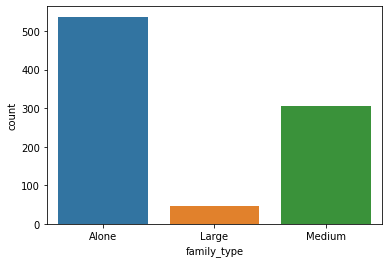

In [ ]:
#family_type
sns.countplot(df['family_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


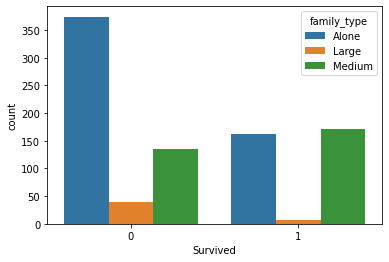

In [ ]:
#Survived vs family_type
sns.countplot(df['Survived'],hue=df['family_type'])

In [ ]:
pd.crosstab(df['family_type'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


# Outliers

## Numerical

### Normal Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


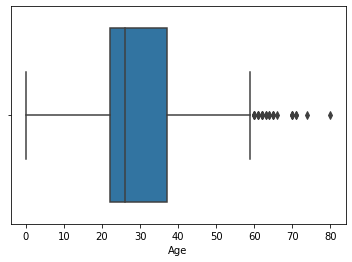

In [ ]:
#Age
sns.boxplot(df['Age'])

In [ ]:
df = df[df['Age']<(df['Age'].mean()+3* df['Age'].std())]

In [ ]:
df.shape

(884, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


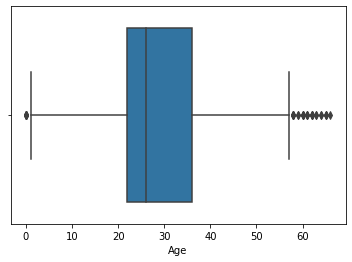

In [ ]:
#Age
sns.boxplot(df['Age'])

### Skewed Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


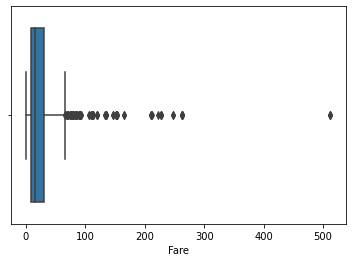

In [ ]:
#Fare
sns.boxplot(df['Fare'])

In [ ]:
Q1 = np.percentile(df['Fare'],25)
Q3 = np.percentile(df['Fare'],75)
Outliers_low = Q1 - 1.5 * (Q3-Q1) 
Outliers_high = Q3 + 1.5 * (Q3-Q1) 
df = df[(df['Fare']>Outliers_low) & (df['Fare']<Outliers_high)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


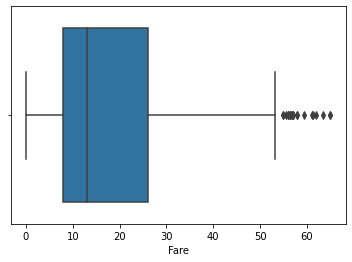

In [ ]:
#Fare
sns.boxplot(df['Fare'])

## Categorical

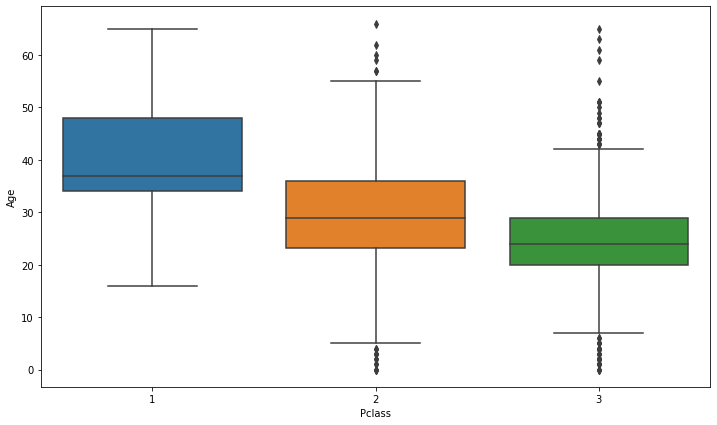

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [ ]:
def impute_outlier(cols):
  Age=cols[0]
  Pclass=cols[1]

  if Pclass == 2:
    if Age > 62:
      return np.NaN
    else:
      return Age 
  elif Pclass == 3:
    if Age >= 52:
      return np.NaN
    else:
      return Age   
  else:
      return Age    

In [ ]:
df['Age']=df[['Age','Pclass']].apply(impute_outlier,axis=1)

In [ ]:
df['Age'].dropna(inplace=True)

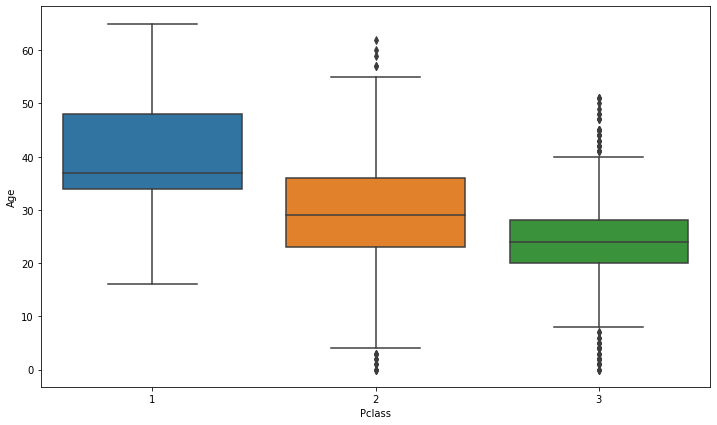

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df)

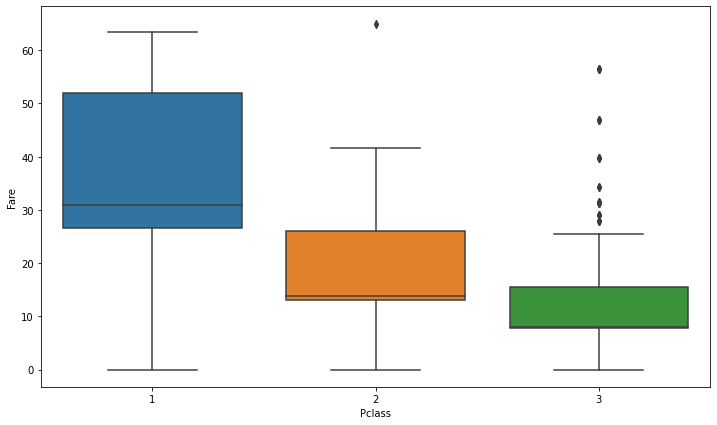

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Fare',data=df)

In [ ]:
def impute_fare(cols):
  Fare=cols[0]
  Pclass=cols[1]

  if Pclass == 2:
    if Fare >= 60:
      return np.NaN
    else:
      return Fare 
  elif Pclass == 3:
    if Fare > 35:
      return np.NaN
    else:
      return Fare   
  else:
      return Fare  

In [ ]:
df['Fare']=df[['Fare','Pclass']].apply(impute_fare,axis=1)

In [ ]:
df['Fare'].dropna(inplace=True)

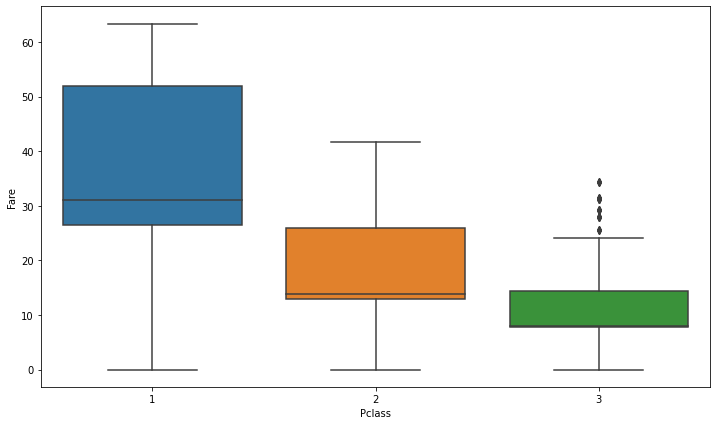

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Fare',data=df)

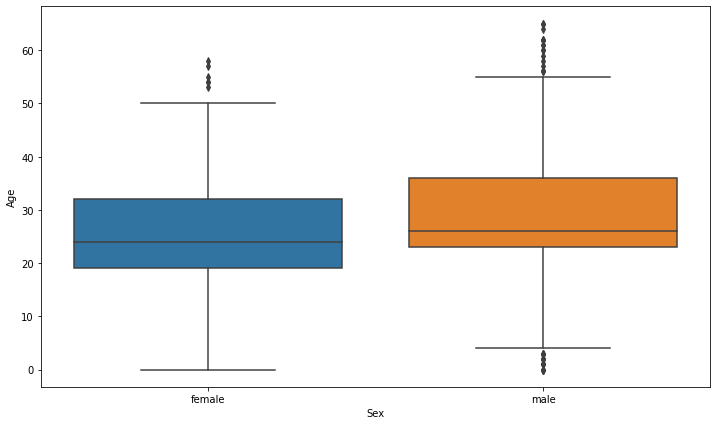

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Sex',y='Age',data=df)

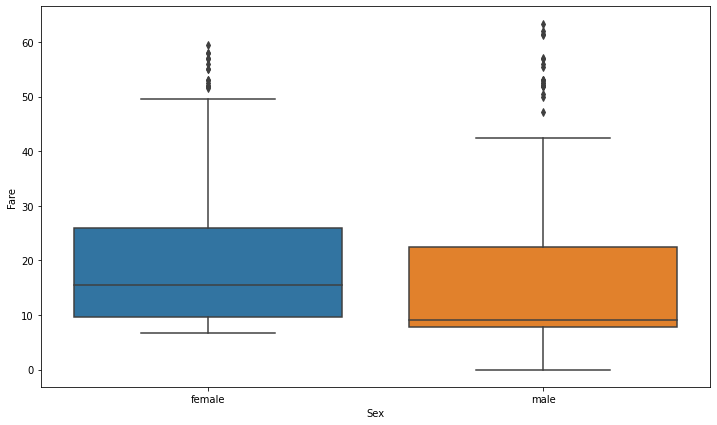

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Sex',y='Fare',data=df)

In [ ]:
def impute_sex(cols):
  Fare=cols[0]
  Sex=cols[1]

  if Sex == 'male':
    if Fare > 45:
      return np.NaN
    else:
      return Fare  
  else:
      return Fare  

In [ ]:
df['Fare']=df[['Fare','Sex']].apply(impute_sex,axis=1)

In [ ]:
df['Fare'].dropna(inplace=True)

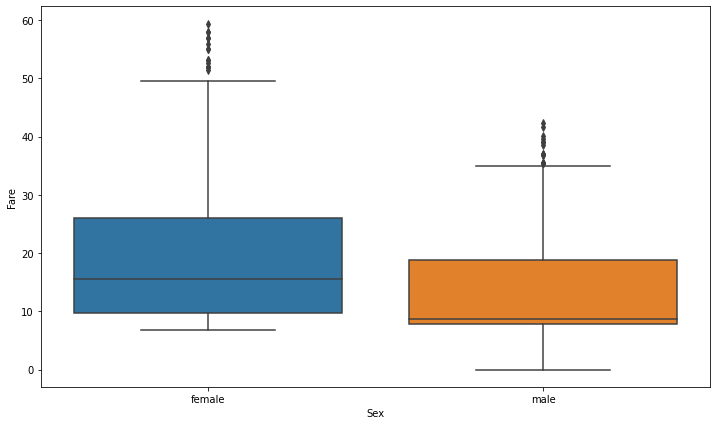

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Sex',y='Fare',data=df)

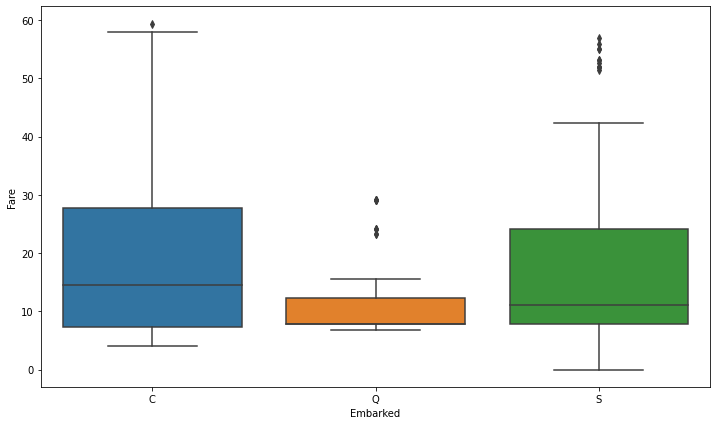

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Embarked',y='Fare',data=df)

In [ ]:
print("People with age in between 60 & 70 are", df[(df['Age']>=60) & (df['Age']<=70)].shape[0])

People with age in between 60 & 70 are 10


# Converting Categorical Features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  769 non-null    int64   
 1   Survived     769 non-null    category
 2   Pclass       769 non-null    category
 3   Name         769 non-null    object  
 4   Sex          769 non-null    category
 5   Age          763 non-null    float64 
 6   SibSp        769 non-null    category
 7   Parch        769 non-null    category
 8   Ticket       769 non-null    object  
 9   Fare         726 non-null    float64 
 10  Embarked     769 non-null    category
 11  family_size  769 non-null    int64   
 12  family_type  769 non-null    category
dtypes: category(7), float64(2), int64(2), object(2)
memory usage: 64.8+ KB


In [ ]:
df = pd.get_dummies(data = df, columns = ['Pclass','Sex','Embarked','family_type'],drop_first=True)

In [ ]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,family_size,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",24.0,0,0,330877,8.4583,0,0,1,1,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         769 non-null    int64   
 1   Survived            769 non-null    category
 2   Name                769 non-null    object  
 3   Age                 763 non-null    float64 
 4   SibSp               769 non-null    category
 5   Parch               769 non-null    category
 6   Ticket              769 non-null    object  
 7   Fare                726 non-null    float64 
 8   family_size         769 non-null    int64   
 9   Pclass_2            769 non-null    uint8   
 10  Pclass_3            769 non-null    uint8   
 11  Sex_male            769 non-null    uint8   
 12  Embarked_Q          769 non-null    uint8   
 13  Embarked_S          769 non-null    uint8   
 14  family_type_Large   769 non-null    uint8   
 15  family_type_Medium  769 non-null    uint

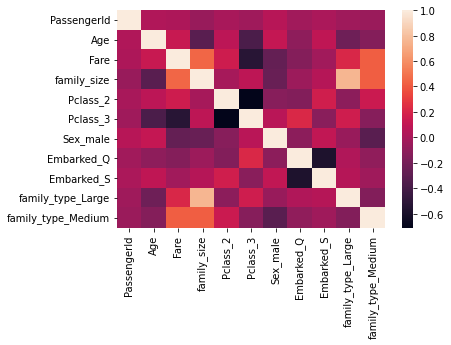

In [ ]:
# Correlation Matrix
sns.heatmap(df.corr())

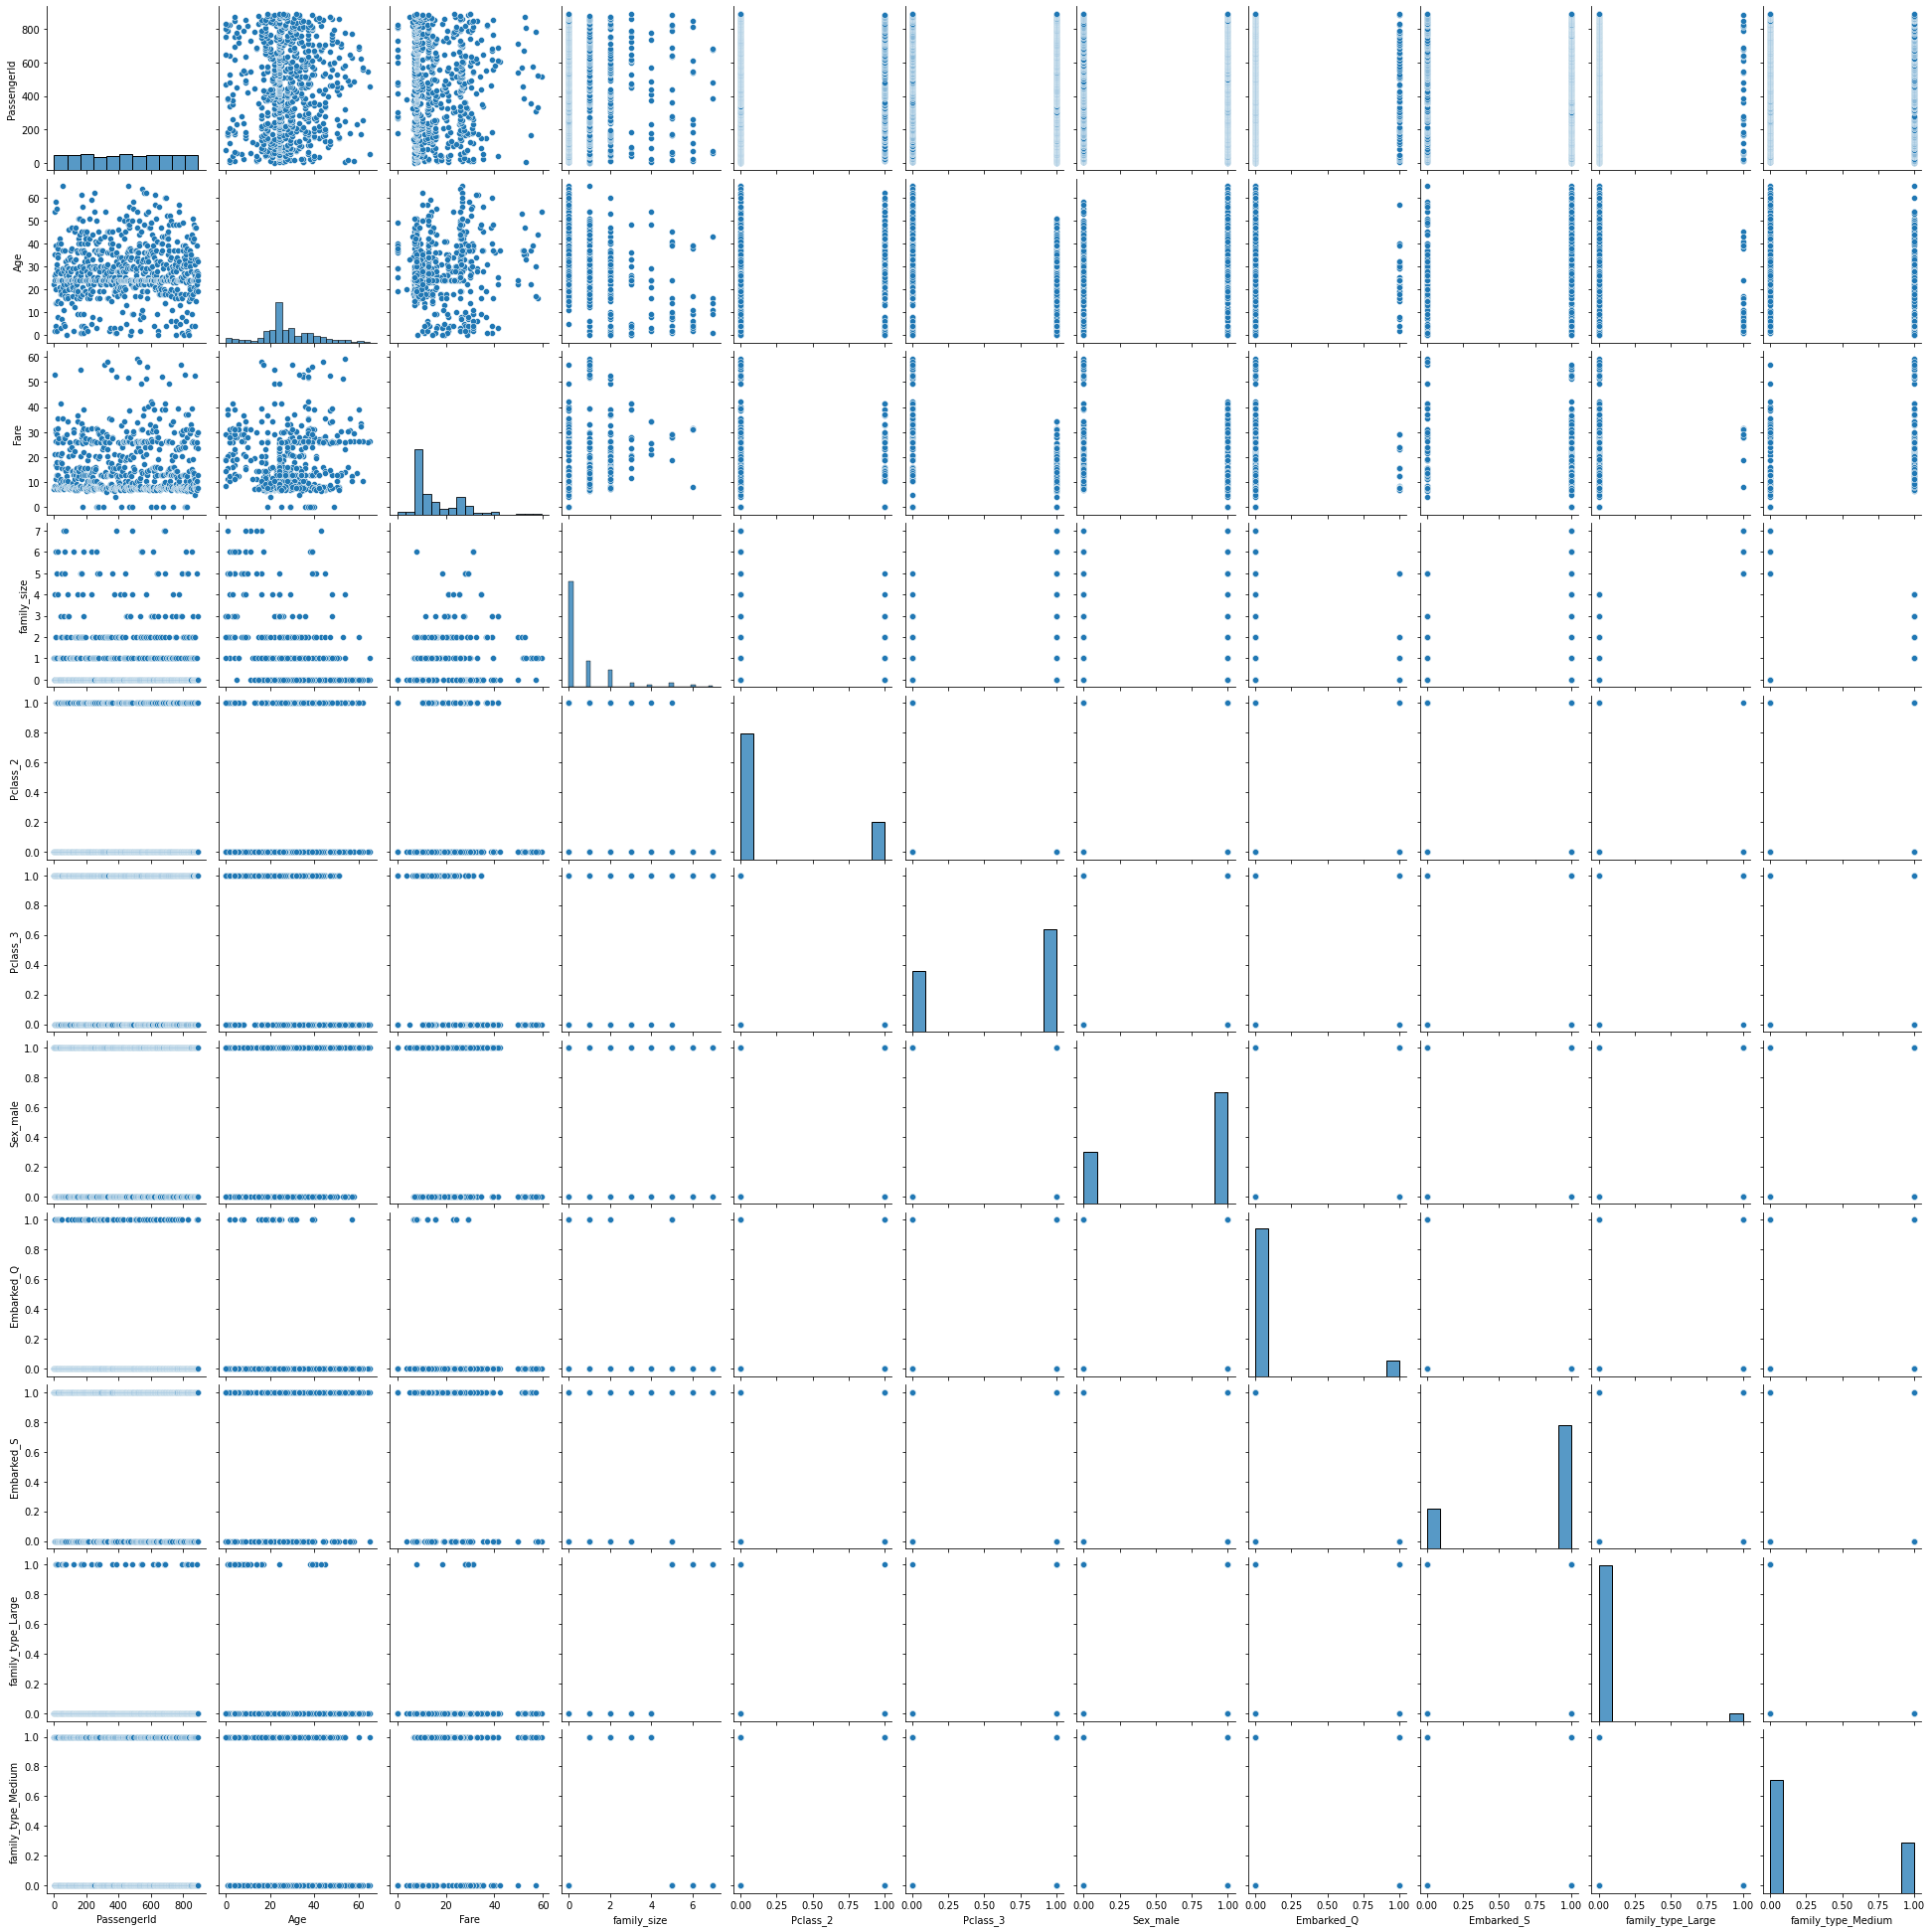

In [ ]:
#Pair Plot
sns.pairplot(df)